In [1]:
# Example to check SPI precip 

import datetime as dt
import xarray as xr
import numpy as np

import libspi as lspi

import matplotlib.pyplot as plt

In [2]:
#open files
file_name_precip="era5_monthly_precipIB.nc" 
file_name_spi6="spi_6_era5_monthly_precipIB.nc" 
file_name_spi12="spi_6_era5_monthly_precipIB.nc" 

ds_precip = xr.open_dataset(file_name_precip)
ds_spi6 = xr.open_dataset(file_name_spi6)
ds_spi12= xr.open_dataset(file_name_spi12)

(516,)


Text(0.5, 1.0, 'SPI 6')

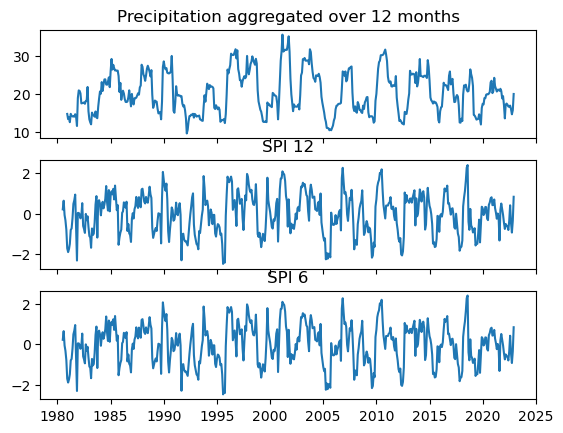

In [5]:
## select on grid-point

plon=-5;plat=40
xp=ds_precip['tp'].sel(latitude=plat,longitude=plon).values
print(xp.shape)
xp=lspi.rolling_sum(xp,n=12,axis=-1)*1000 # *1000 to conver from "m" to "mm"
x6=ds_spi6['spi'].sel(latitude=plat,longitude=plon).values
x12=ds_spi12['spi'].sel(latitude=plat,longitude=plon).values
fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True)
ax1.plot(ds_precip.time,xp)
ax1.set_title('Precipitation aggregated over 12 months')
ax2.plot(ds_spi12.time,x12)
ax2.set_title('SPI 12')
ax3.plot(ds_spi6.time,x6)
ax3.set_title('SPI 6')
